# Assignment 1

    
### Submission Instruction: name your file properly

You can complete your assignment on this notebook. Then, save it as (or convert it to) a .py file and name it as CDS1.NN.py where NN denotes the last two digits of your roll number. For example, if your roll number is 23, the filename should be CDS1.23.py

As default, it has been set to 00 now. Upload your submission to Google classroom before the deadline.  


### Note: keep the functions the way they are defined

Keep the functions the way they are defined. Do not change the name or the parameters. If you need to, you can define more functions on your own. You may also write code to test your functions, but while submitting just submit the functions (delete or comment out extra code, such as extra print statements). 

## Late submission policy:

If you submit late, your submission will still be graded, but your marks will be penalized at the rate of 1% per 15 minutes (4% per hour), which translates to 48% in 12 hours, and 100% (no marks at all) if you submit 25 hours late. Since things may go wrong at the last minute, please try to complete the assignment well ahead of time. 

## Problem 1: neither minimum nor maximum 

Given a list of non negative integers (which may not be all distinct), return any one integer that is neither the maximum, nor the minimum of the list. If no such integer exists, return -1.

Example: 

nums = [1,2,1,2,1,3,2,5,8]

Possible answer: 2,3,5

nums = [1,1,1,1,1,0,0,0,0,1,1,0]

Answer: -1

In [180]:
nums = [1,2,1,2,1,3,2,5,8]
# nums = [1,1,1,1,1,0,0,0,0,1,1,0]
# nums = [4,4,2,2,3,3,1,1,1]

In [181]:
# Approach 1: Find the first 3 distinct elements in the list, store in a,b,c and return the middle value among a,b,c
# if less than 3 ditinct elements found then return -1

def notMaxNotMin(nums):
    a=None
    b=None
    c=None
    
    for i in range(0,len(nums)):
        if( a == None):        #store 1st element in a
            a=nums[i]
        if( (a!= nums[i]) & (b== None) ):   # store 2nd distinct element in b
            b=nums[i]
        if( (a!= nums[i]) & (b!= nums[i])):  # store 3rd distinct element in c
            c=nums[i]
            break
    
    if( (a==None) | (b==None) | (c==None)):
        return -1
    if ( (a<b<c)|(c<b<a)):
        return b
    if ( (b<a<c)|(c<a<b)):
        return a
    if ( (a<c<b)|(b<c<a)):
        return c

In [182]:
notMaxNotMin(nums)

2

In [183]:
# Approach 2: find min and max value from the list, return value which is neither min nor max

def notMaxNotMin(nums):
    max_val = max(nums)
    min_val = min(nums)
    for i in range(0,len(nums)):
        if( (max_val != nums[i]) & (min_val != nums[i])):
            return nums[i]
    return -1

In [184]:
notMaxNotMin(nums)

2

## Problem 2: Find 3 integers whose sum is zero *

Given a list nums, find any 3 integers in the list such that their sum is zero and return the 3 integers in a list. You may <i>not</i> use the same integer multiple times, even if they are present in different positions. If there are multiple possible solutions for a given list, return any one. If there is no such solution, return an empty list [ ].

Example: 

nums = [1,-2,-1,3,4]

Possible answer: [-2,-1,3]

nums = [1,2,1,-1,3,6]

Answer: [ ]

In [206]:
nums = [1,-2,-1,3,4]
# nums = [1,2,1,-1,3,6]
# nums=[1,2,1,-2,3,6]

In [186]:
# Approach 1:  O(n3) solution

def sumOf3(nums):
    for i in range(0,len(nums)):
        for j in range(0,len(nums)):
            if(nums[j] != nums[i]):
                for k in range(0,len(nums)):
                    if( (nums[k]!= nums[j]) & (nums[k]!= nums[i]) ):
                        if( (nums[i] + nums[j] + nums[k]) == 0 ):
                            return [nums[i], nums[j], nums[k]]
    return []

In [187]:
sumOf3(nums)

[-2, -1, 3]

In [223]:
# Approach2: O(n2) solution

def twosum(nums, target):
    present = {}
    for x in nums:
        present[x] = 1
    
    for x in nums:
        if target - x != x:
            if present.get(target-x, 0) == 1:
                return [x, target-x]
    return []


def sumOf3(nums):
    present = {}
    distinct_nums = []
    for x in nums:
        present[x] = 1
        
    for x in present:                               #creating distict number list by iterating the dictionary 
        distinct_nums.append(x)
    
    for x in distinct_nums:                         # distinct value list is created  since any of the 3 numbers can't be same
        temp_distinct_nums = distinct_nums.copy()
        temp_distinct_nums.remove(x)               # create a sublist with all values except the first chosen number
        y = twosum(temp_distinct_nums, -x)     #Sublist will be searched for two numbers whose sum will be equal to -ve of 3rd
        if(y != []):
            z = []
            z.append(x)
            z.extend(y)
            return z
        
    return []



In [224]:
sumOf3(nums)

[-2, -1, 3]

## Problem 3: Find a duplicate with $O(1)$ extra space **

Let nums be an input list of length $n$ such that the elements of nums are all in the range $0, \dots, n-1$. Write a function to identify (and return) any number that appears at least twice in the list. However, you are allowed to use only $O(1)$ extra space. In other words, you cannot use an extra list of the same size or a dictionary to store the counts of the numbers in the list. As far as running time is concerned, it should be possible to do it in $O(n)$ time, but do the best you can. If there is no duplicate number in the list, return -1. 

<b>Hint:</b> In the process, you are allowed to change the content of the list. 

In [234]:
nums = [1,2,3,5,6,3,6]

In [235]:
# O(n2) solution

def findDuplicate(nums):
    for i in range(0,len(nums)):
        for j in range(i+1,len(nums)):
            if(nums[i] == nums[j]):
                return nums[i]
    return -1

In [236]:
findDuplicate(nums)

3

## Problem 4: Matrix - matrix multiplication  

Implement the matrix - matrix multiplication function without using any special numpy operator. Given two 2-D numpy arrays (you can assume they are of matching shape, i.e., <tt>(m,n)</tt> and <tt>(n,p)</tt>, your function should return the product matrix in another 2-D array. You should not use the built-in <tt>np.dot</tt> or any equivalent operator. 

In [193]:
import numpy as np

In [203]:
M1 = np.array([[1,2,3],[4,5,6]])

M2 = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])

In [204]:
def matrixProduct(M1, M2):
    m = M1.shape[0]
    n = M1.shape[1]

    n1 = M2.shape[0]
    p = M2.shape[1]

    if(n != n1):
        return -1               # return -1 if matrix multiplication is not defined

    M = []
    
    for i in range(0,m):
        row = []
        for j in range(0,p):
            sum = 0
            for k in range(0,n):
                sum = sum + M1[i,k]*M2[k,j]         
            row.append(sum)                  # entry in a row
        M.append(row)                        # row of matrtrix M

    M_final = np.array(M)
    return M_final

In [205]:
matrixProduct(M1, M2)

array([[ 38,  44,  50,  56],
       [ 83,  98, 113, 128]])

## Problem 5: Find the area of the unit circle computationally 

We all know that the area of the unit circle is $\pi$. In this exercise, let us estimate it using Monte-Carlo method. 

* Generate $N$ points uniformly at random as shown in the picture (all the blue and green points).
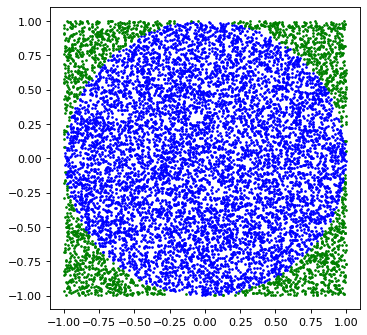
* Count the number of points which fall within the unit circle (use the equation of the circle). Let the number be $n$.

From the above, compute the area of the circle.  

In [197]:
def areaOfUnitCircle():
    # Set N to be 1000 or 10000 when you test your code, later on increase it to 1 million
    N = 100000
    
    x = np.random.uniform(-1,1,N)
    y = np.random.uniform(-1,1,N)              
    # Pair of randomly generated x[i] and y[i] between -1 and 1  will act as randomly generated point inside the square

    count_in_circle = 0 
    for i in range(0,N):
        if( (x[i]**2 + y[i]**2) < 1):
            count_in_circle = count_in_circle + 1

    # count_in_circle/N    =  area of circle / area of square = pie /4
    # area of circle = pie  = 4 * count_in_circle/N

    pie = 4*count_in_circle/N
    return pie

In [198]:
areaOfUnitCircle()

3.1428